<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  SVD en reconocimiento facial

En este caso-taller vamos a aplicar SVD para hacer reconocimiento facial. Esta aplicación se conoce como caras propias, o eigenfaces en inglés, y si bien es una forma rudimentaria de reconocimiento facial sus resultados pueden ser muy interesantes. El problema de las caras propias fue estudiado por primera vez por Sirovich y Kirby en 1987, ampliado en 1990 y su aplicación al reconocimiento facial automatizado fue presentado por Turk and Pentland en 1991.

En este taller vamos a utilizar la base de datos conocida como Caras Etiquetadas en la Naturaleza, o Labeled Faces in the Wild (LFW). Esta base es provista por la Universidad de Massachusetts Amherst para que la comunidad académica la utilice para la evaluación de modelos predictivos.

La base contiene más de 13.000 imágenes de rostros recopilados de la web y cada cara ha sido etiquetada con el nombre de la persona representada. Un subconjunto de 1.680 de las personas fotografiadas tienen dos o más fotos distintas en el conjunto de datos. 


 
#### Referencias

- G. B. Huang,  M. Ramesh, T. Berg, and E. Learned-Miller. Labeled Faces in the Wild: A Database for Studying Face Recognition in Unconstrained Environments. University of Massachusetts, Amherst, Technical Report 07-49, October, 2007.

- M. Kirby and L. Sirovich. Application of the Karhunen-Loève procedure for the characterization of human faces. IEEE Transactions on Pattern Analysis and Machine Intelligence (PAMI), 12(1):103–108, 1990.

- L. Sirovich and M. Kirby. A low-dimensional procedure for the characterization of human faces. Journal of the Optical Society of America A, 4(3):519–524, 1987

- M. Turk and A. Pentland. Eigenfaces for recognition. Journal of Cognitive Neuroscience, 3(1):71–86, 1991.

## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "Revisión por el compañero".

4. El archivo entregado debe poder ser ejecutado localmente por los pares. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos  en la misma ruta de acceso del cuaderno, por ejemplo: `data`.

In [138]:
# Importar Librerias
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
from pca import pca
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.datasets import fetch_lfw_people
from scipy.linalg import svd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score
from sklearn.model_selection import KFold, cross_val_score

## Desarrollo


### 1. Carga de datos 

Los datos pueden ser descargados directamente utilizando la librería `scikit-learn`, para ello cargue la base utilizando la función `fetch_lfw_people`. Esta función verificará si los datos están disponibles. De no estarlo, `scikit-learn` los descargará automáticamente desde el sitio web de la Universidad de Massachusetts. Descargue las imágenes para individuos que tengan al menos 25 imágenes y guárdelos en una carpeta llamada `data` usando esta función.

In [4]:
# Utilice este espacio para escribir el código.
data_people = fetch_lfw_people(min_faces_per_person=25, data_home='data')

Se realiza la carga de los datos de la libreria skitlearn y su función fetch_lfw_people, trayendo las imagenes de individuos que tienen al menos 25 imágenes y quedan guardados en la carpeta data dentro del espacio de trabajo del notebook

### 2.  Análisis preliminar 

Describa los contenidos de la base, tenga en cuenta que debe detallar los elementos, la dimensión de la base, y la dimensión de las imágenes. 

In [7]:
data_people.DESCR

".. _labeled_faces_in_the_wild_dataset:\n\nThe Labeled Faces in the Wild face recognition dataset\n------------------------------------------------------\n\nThis dataset is a collection of JPEG pictures of famous people collected\nover the internet, all details are available on the official website:\n\nhttp://vis-www.cs.umass.edu/lfw/\n\nEach picture is centered on a single face. The typical task is called\nFace Verification: given a pair of two pictures, a binary classifier\nmust predict whether the two images are from the same person.\n\nAn alternative task, Face Recognition or Face Identification is:\ngiven the picture of the face of an unknown person, identify the name\nof the person by referring to a gallery of previously seen pictures of\nidentified persons.\n\nBoth Face Verification and Face Recognition are tasks that are typically\nperformed on the output of a model trained to perform Face Detection. The\nmost popular model for Face Detection is called Viola-Jones and is\nimple

In [8]:
print(data_people.data.shape)  

(2588, 2914)


El conjunto de datos contiene información de 2588 imágenes y cuyo total de pixeles por imagen es de 2914

In [10]:
print(data_people.images.shape) 
print(len(data_people.target_names)) 

(2588, 62, 47)
42


Cada una de las 2588 imágenes tiene un dimensionamiento de 62 x 47 píxeles y hay un total de 42 personas distintas.

In [12]:
print(data_people.target_names)  

['Alejandro Toledo' 'Alvaro Uribe' 'Andre Agassi' 'Ariel Sharon'
 'Arnold Schwarzenegger' 'Bill Clinton' 'Colin Powell' 'David Beckham'
 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Gloria Macapagal Arroyo' 'Gray Davis' 'Guillermo Coria' 'Hans Blix'
 'Hugo Chavez' 'Jack Straw' 'Jacques Chirac' 'Jean Chretien'
 'Jennifer Capriati' 'John Ashcroft' 'John Negroponte'
 'Juan Carlos Ferrero' 'Junichiro Koizumi' 'Kofi Annan' 'Laura Bush'
 'Lleyton Hewitt' 'Luiz Inacio Lula da Silva' 'Mahmoud Abbas'
 'Megawati Sukarnoputri' 'Nestor Kirchner' 'Recep Tayyip Erdogan'
 'Ricardo Lagos' 'Roh Moo-hyun' 'Rudolph Giuliani' 'Serena Williams'
 'Silvio Berlusconi' 'Tom Daschle' 'Tom Ridge' 'Tony Blair' 'Vicente Fox'
 'Vladimir Putin']


 Según la descripción del dataset y la observación antrerior, entre las imágenes podemos observar que corresponden a fotos de varias celebridades del orden nacional y mundial como  'Alvaro Uribe', 'Arnold Schwarzenegger', 'George W Bush', 'Nestor Kirchner', 'Vladimir Putin' entre otros muchos más.

In [14]:
data_people.target

array([10,  9, 41, ...,  9, 11,  9], dtype=int64)

In [15]:
X = data_people.data
X = pd.DataFrame(X)

y = pd.Series(data_people.target).map(lambda i: data_people.target_names[i])
y = pd.DataFrame(y, columns=['nombre'])

#df = X.join(y)
df = pd.concat([y, X], axis=1)
df.head()

,nombre,0,1,2,3,4,5,6,7,8,...,2904,2905,2906,2907,2908,2909,2910,2911,2912,2913
0,Gerhard Schroeder,0.152941,0.193464,0.202614,0.236601,0.304575,0.384314,0.440523,0.444444,0.431373,...,0.134641,0.139869,0.147712,0.155556,0.160784,0.166013,0.173856,0.179085,0.183007,0.186928
1,George W Bush,0.201307,0.214379,0.231373,0.256209,0.278431,0.300654,0.316340,0.339869,0.362092,...,0.550327,0.794771,0.926797,0.932026,0.894118,0.887582,0.925490,0.909804,0.816993,0.631373
2,Vladimir Putin,0.375163,0.380392,0.435294,0.586928,0.631373,0.636601,0.670588,0.688889,0.687582,...,0.989542,1.000000,0.926797,0.369935,0.070588,0.092810,0.083660,0.091503,0.090196,0.090196
3,Colin Powell,0.711111,0.707190,0.624837,0.465359,0.402614,0.430065,0.573856,0.670588,0.745098,...,0.362092,0.381699,0.437909,0.467974,0.462745,0.479739,0.504575,0.419608,0.107190,0.060131
4,George W Bush,0.369935,0.443137,0.564706,0.641830,0.687582,0.667974,0.607843,0.577778,0.537255,...,0.050980,0.069281,0.079739,0.086275,0.096732,0.039216,0.062745,0.070588,0.083660,0.078431


In [16]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,2904,2905,2906,2907,2908,2909,2910,2911,2912,2913
count,2588.000000,2588.000000,2588.000000,2588.000000,2588.000000,2588.000000,2588.000000,2588.000000,2588.000000,2588.000000,...,2588.000000,2588.000000,2588.000000,2588.000000,2588.000000,2588.000000,2588.000000,2588.000000,2588.000000,2588.000000
mean,0.336347,0.347963,0.368833,0.397867,0.430452,0.460584,0.488662,0.513948,0.535827,0.553767,...,0.424461,0.447376,0.468826,0.483225,0.485119,0.476734,0.465141,0.450151,0.428870,0.407358
std,0.195336,0.193593,0.192417,0.192542,0.192106,0.190623,0.183995,0.177622,0.172915,0.168436,...,0.229620,0.245658,0.260012,0.272401,0.279877,0.286832,0.292228,0.295325,0.294346,0.294820
min,0.000000,0.000000,0.000000,0.001307,0.003922,0.005229,0.007843,0.005229,0.013072,0.023529,...,0.003922,0.002614,0.002614,0.002614,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.186928,0.201307,0.222222,0.256209,0.304575,0.337255,0.372549,0.405229,0.430065,0.456209,...,0.258824,0.267974,0.271895,0.264052,0.252288,0.230065,0.197386,0.177778,0.164706,0.145098
50%,0.313726,0.334641,0.363399,0.398693,0.434641,0.471895,0.498693,0.522876,0.545098,0.564706,...,0.398693,0.418301,0.441830,0.451634,0.458824,0.456209,0.436601,0.410458,0.378431,0.340523
75%,0.458824,0.471895,0.496732,0.526797,0.559477,0.589543,0.610784,0.633987,0.650980,0.667974,...,0.560784,0.606536,0.647059,0.699346,0.716667,0.717647,0.717974,0.699673,0.673203,0.657516
max,0.996078,0.996078,0.996078,0.993464,0.993464,0.993464,0.996078,0.998693,0.992157,0.992157,...,0.993464,1.000000,0.998693,1.000000,1.000000,1.000000,1.000000,1.000000,0.998693,1.000000


Sobre los datos podemos observar que en general la media de luminosidad se mueve entre 0.33 y 0.47 aproximadamente, con desviaciones estándar entre 0.19 y 0.28 aprox. De igual forma, se ve que para la gran mayoría de las imágenes, se tienen desde pixeles 0 (color negro) y 1(color blanco). A su vez, por los valores que toman los pixeles, que están en un rango de entre 0 y 1, podemos entender que los datos ya se encuentran normalizados.

A continuación responda las siguientes preguntas: 

- ¿Cuál es la distribución de imágenes por individuos? 

In [20]:
conteo_imagenes = df['nombre'].value_counts()
conteo_imagenes

George W Bush                530
Colin Powell                 236
Tony Blair                   144
Donald Rumsfeld              121
Gerhard Schroeder            109
Ariel Sharon                  77
Hugo Chavez                   71
Junichiro Koizumi             60
Jean Chretien                 55
John Ashcroft                 53
Jacques Chirac                52
Serena Williams               52
Vladimir Putin                49
Luiz Inacio Lula da Silva     48
Gloria Macapagal Arroyo       44
Arnold Schwarzenegger         42
Jennifer Capriati             42
Lleyton Hewitt                41
Laura Bush                    41
Alejandro Toledo              39
Hans Blix                     39
Nestor Kirchner               37
Andre Agassi                  36
Alvaro Uribe                  35
Megawati Sukarnoputri         33
Silvio Berlusconi             33
Tom Ridge                     33
Roh Moo-hyun                  32
Kofi Annan                    32
Vicente Fox                   32
David Beck

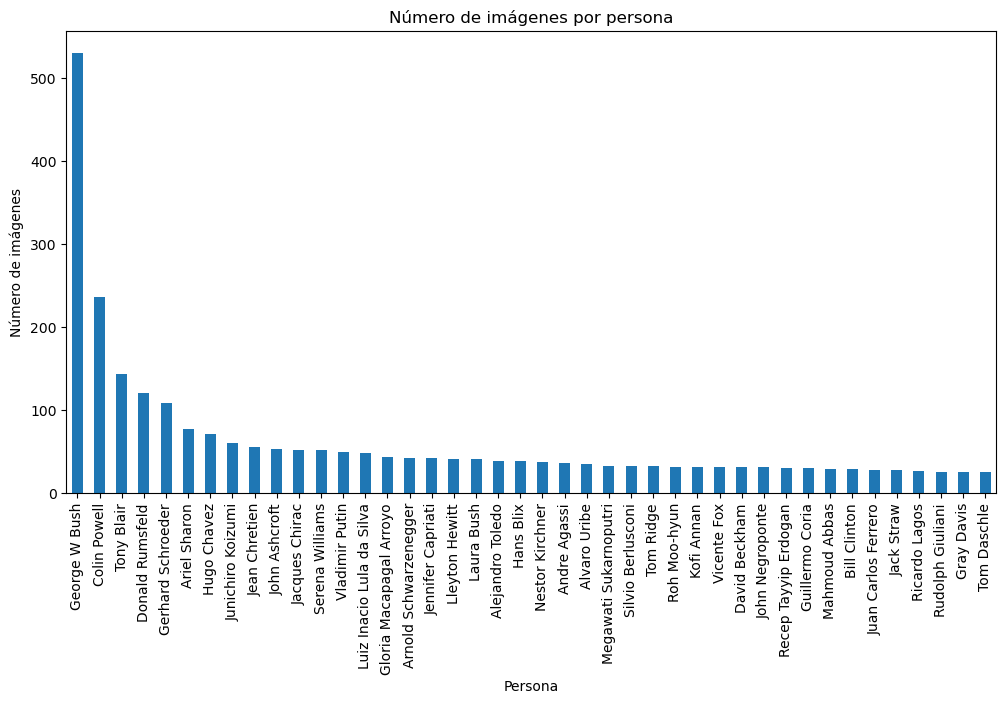

In [21]:
plt.figure(figsize=(12,6))
conteo_imagenes.plot(kind='bar')
plt.xlabel('Persona')
plt.ylabel('Número de imágenes')
plt.title('Número de imágenes por persona')
plt.xticks(rotation=90)
plt.show()

Esta es la distirbución de imágenes por individuo donde encontramos que la persona con mayor número de imágenes es George W Bush (530), seguido por Colin Powell (236) y Tony Blair (144). A su vez, las personas con menor número de imágenes son Rudolph Giuliani (26),Gray Davis (26) y Tom Daschle (25).

- ¿Cuántas imágenes pertenecen a Serena Williams? Grafíquelas 

In [24]:
nombre = "Serena Williams"
indices_serena = df.index[df['nombre'] == nombre].tolist()
n = len(indices_serena)
print(f'Serena Williams tiene un total de {n} imagenes')

Serena Williams tiene un total de 52 imagenes


In [25]:
n_samples, h, w = data_people.images.shape

In [26]:
h

62

In [27]:
w

47

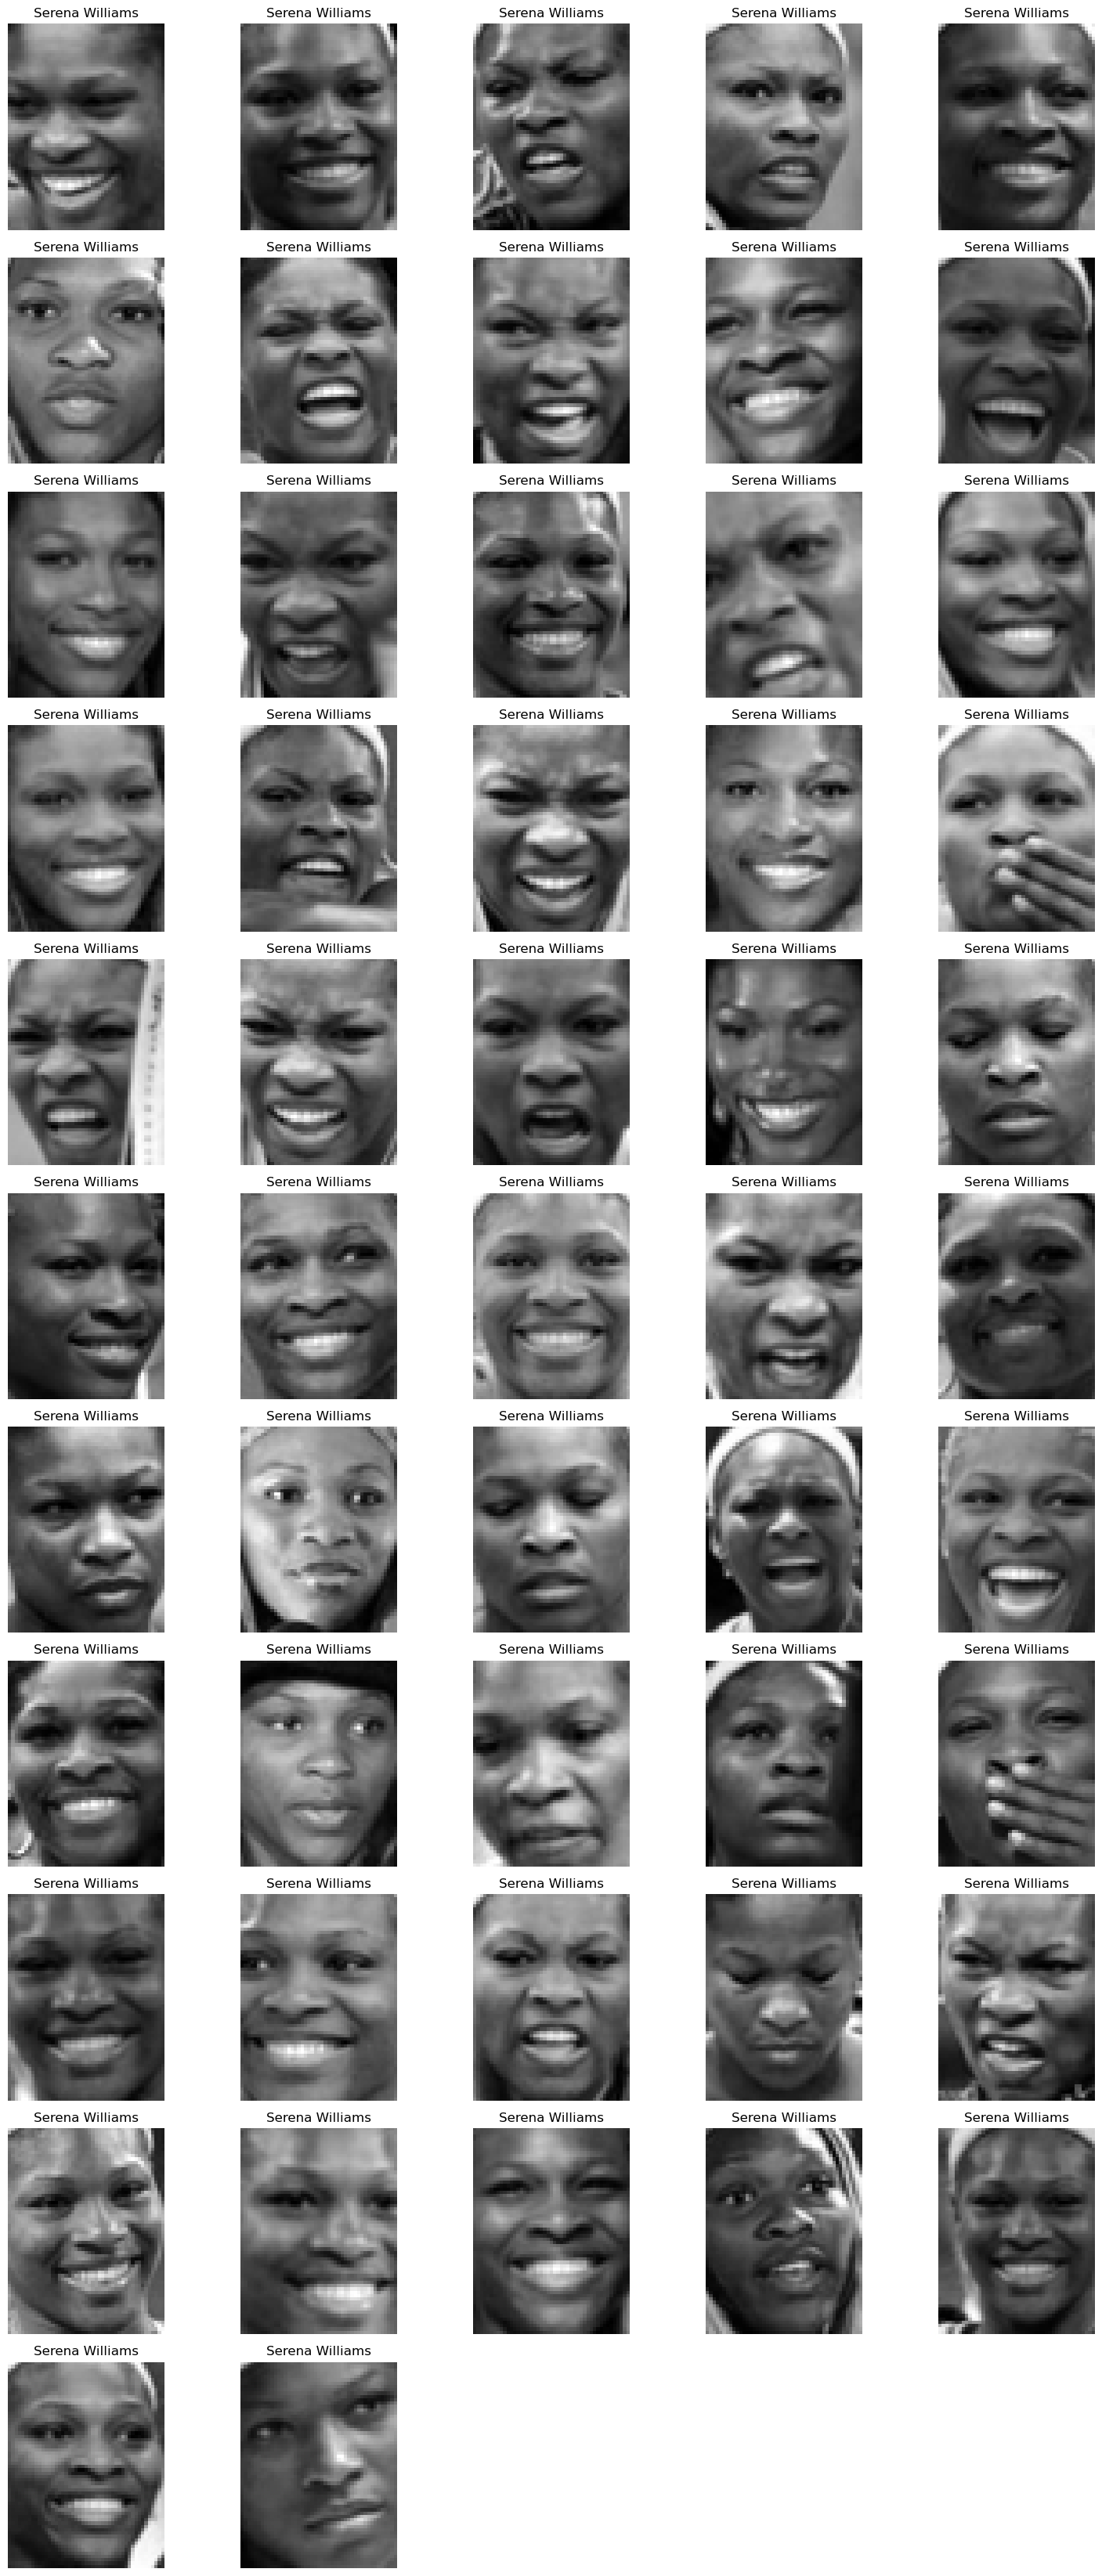

In [29]:
cols = 5
rows = (n + cols - 1) // cols

plt.figure(figsize=(15, 3*rows))

for i, idx in enumerate(indices_serena):
    plt.subplot(rows, cols, i+1)
    img = X.iloc[idx].to_numpy().reshape(h,w)
    plt.imshow(img, cmap='gray')
    plt.title(nombre)
    plt.axis('off')

plt.tight_layout()
plt.show()

Se grafican los 52 rostros de Serena Williams en los que se pueden diferenciar multiples gestos y reacciones de la tenista.

### 3.  Reconociendo rostros: las eigenfaces

Las eigenfaces son un conjunto de eigenvectors utilizados en el campo de la visión por computadora, principalmente en el reconocimiento de rostros. Son el resultado de reducir la dimensión de un gran conjunto de imágenes faciales, manteniendo la información que es más relevante para diferenciar las caras.

En este apartado buscaremos encontrar el espacio de menor dimensión manteniendo la información que es más relevante para diferenciar las caras. Lo haremos en etapas:


#### 3.1. Rostro promedio. 

Encuentre primero el "rostro promedio" y grafíquelo.  Para encontrar este rostro, necesita calcular el valor promedio de los pixeles. (*Tip: Si X es la matriz donde las filas representan las imágenes  y en las columnas el tono de gris de los píxeles, debería calcular el promedio para cada una de las columnas*).
 

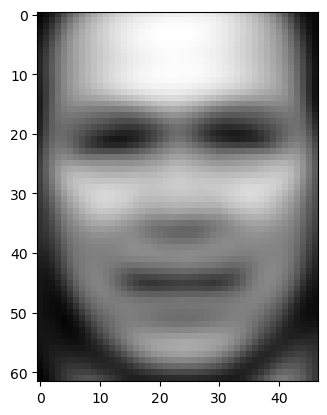

In [37]:
Xmean = X.mean(axis=0)
plt.imshow(Xmean.to_numpy().reshape((h, w)), cmap=plt.cm.gray)

Se extrae la media de pixeles para la matrix X. Como resultado, se puede observar con una distorsión razonable, el rostro de una persona de test blanca y se pueden identificar elementos fundamentales del rostro como ojos, nariz, boca, frente, mentón, contorno de rostro, entre otros.

#### 3.2. Reste el rostro promedio.

A cada una de las imágenes, reste el rostro promedio, es decir, reste la media a cada columna. Grafique las imágenes de Serena Williams luego de quitarle el rostro promedio.

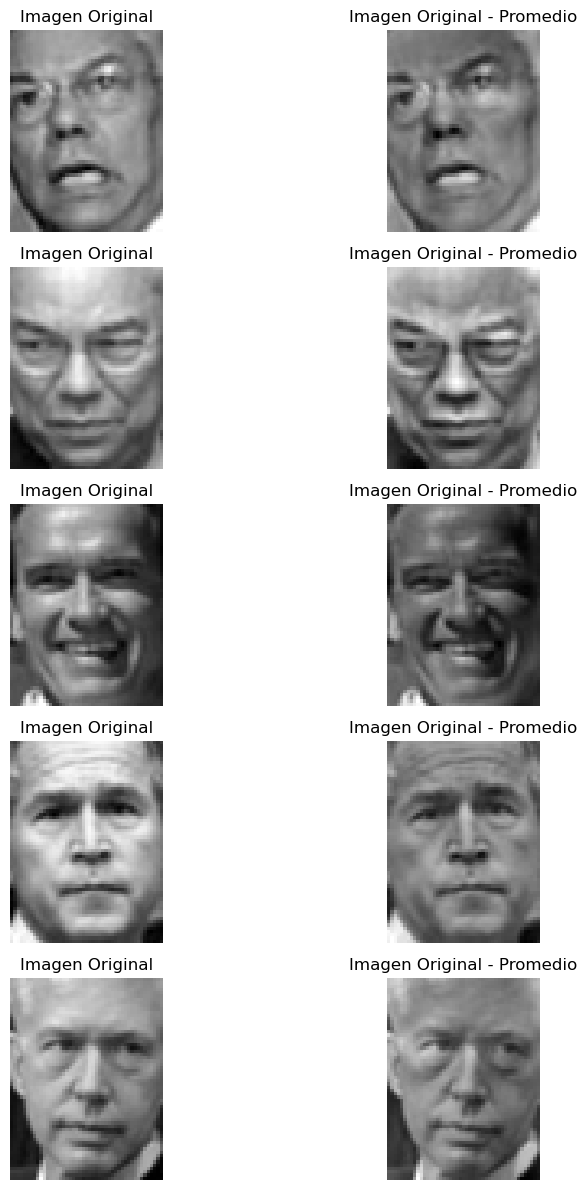

In [40]:
ejemplos = np.random.choice(X.shape[0], size=5, replace=False)
Demean=X-Xmean 

plt.figure(figsize=(10, 12))

for i, idx in enumerate(ejemplos):
    # Imagen original
    img_original = X.iloc[idx].to_numpy().reshape((h, w))
    
    # Imagen - promedio
    img_dif = Demean.iloc[idx].to_numpy().reshape((h, w))
    
    # Graficar original
    plt.subplot(len(ejemplos), 2, 2*i+1)
    plt.imshow(img_original, cmap="gray")
    plt.title("Imagen Original")
    plt.axis("off")
    
    # Graficar diferencia
    plt.subplot(len(ejemplos), 2, 2*i+2)
    plt.imshow(img_dif, cmap="gray")
    plt.title("Imagen Original - Promedio")
    plt.axis("off")

plt.tight_layout()
plt.show()

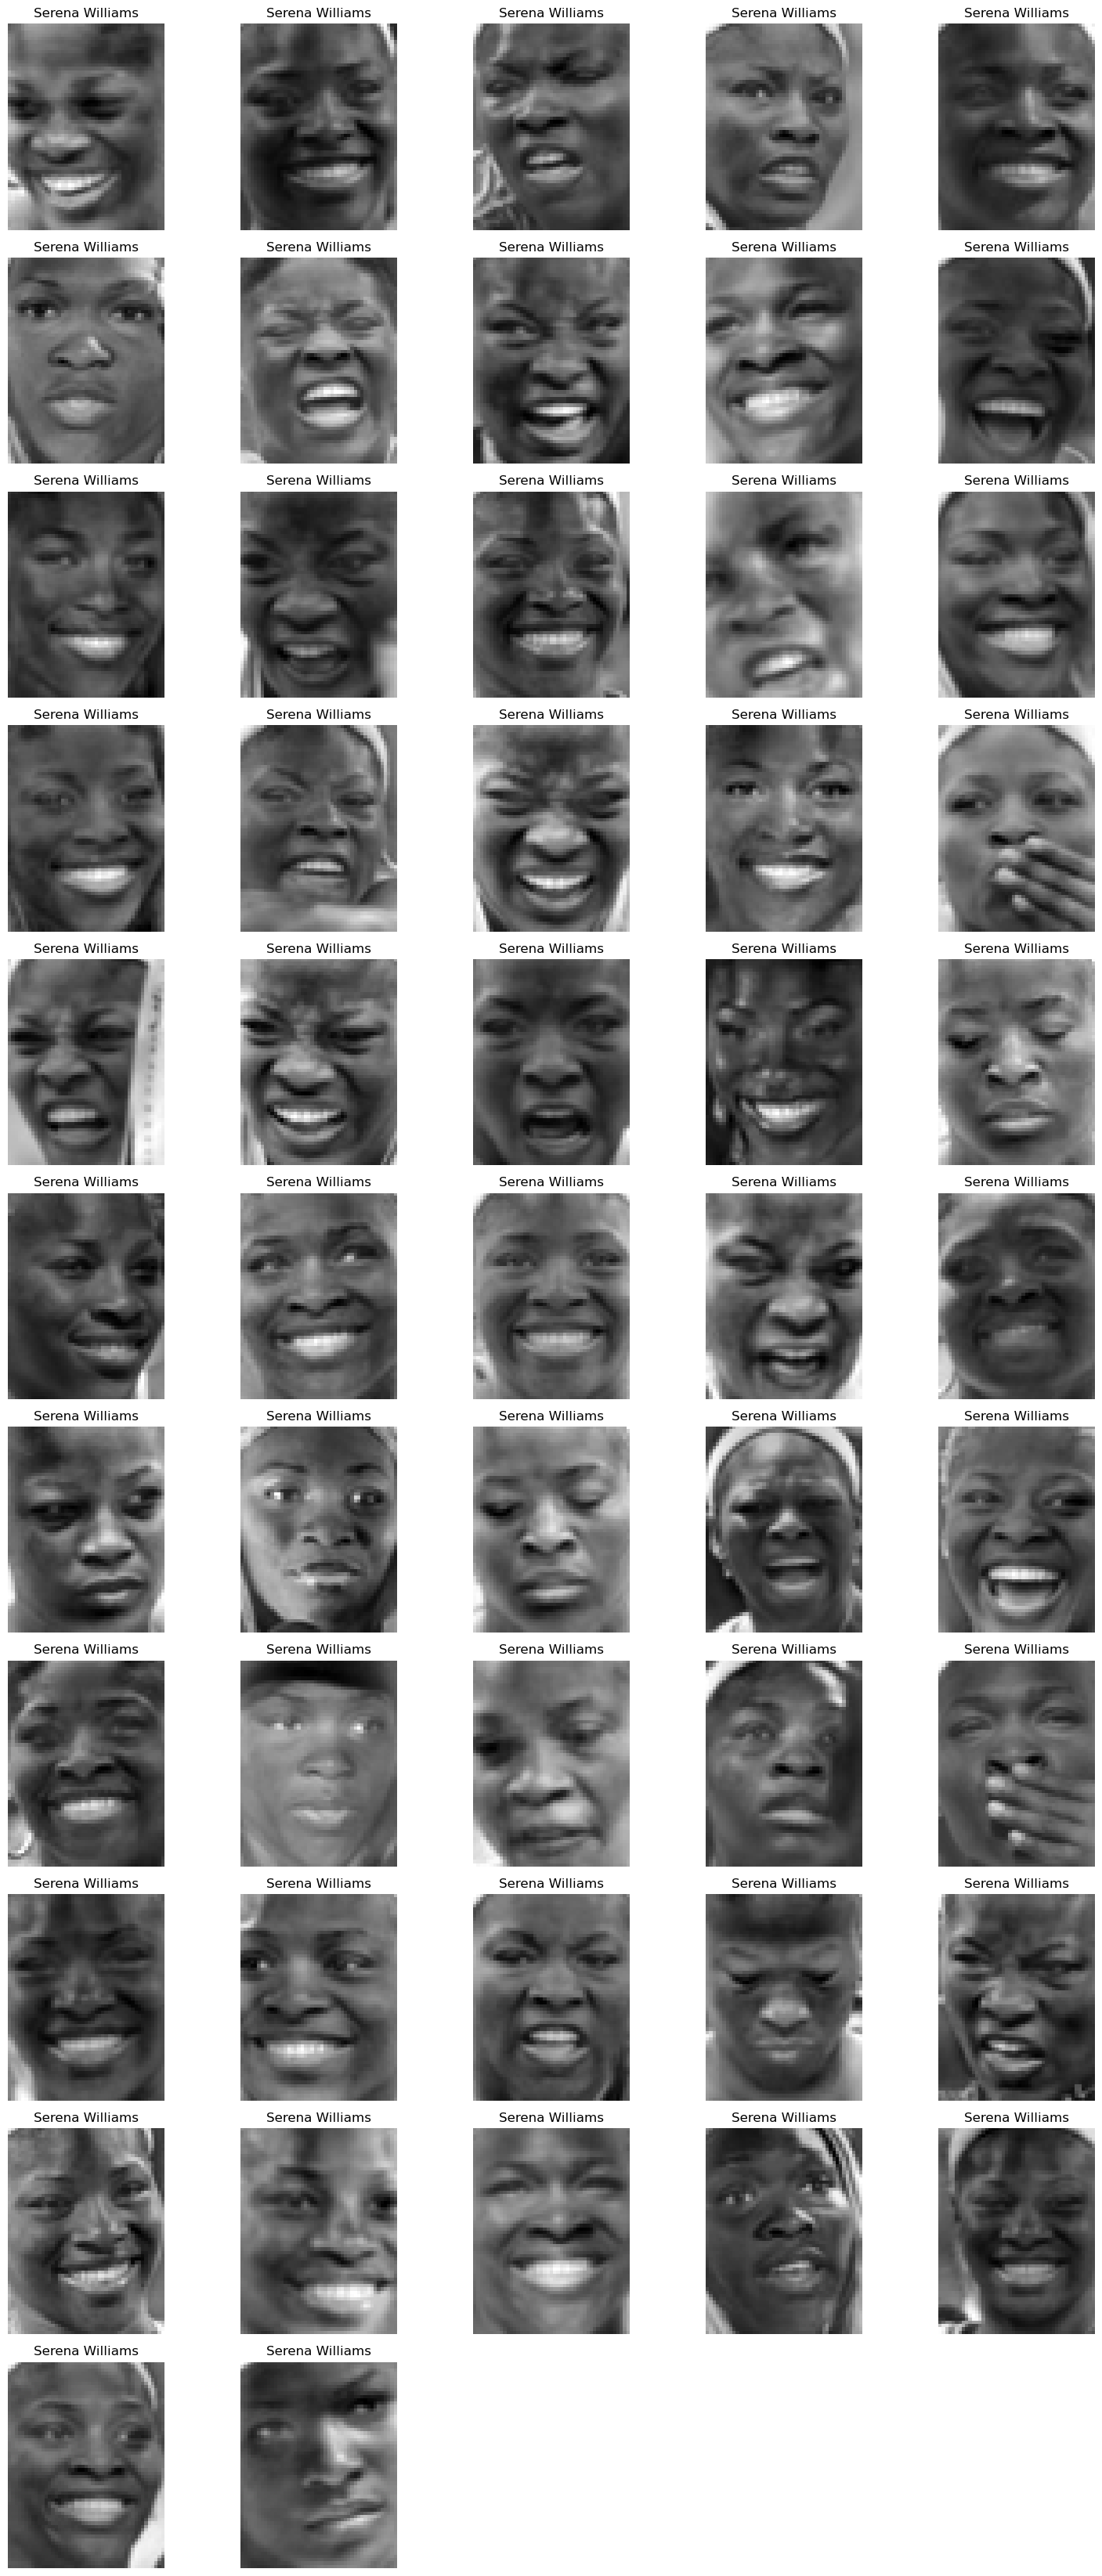

In [41]:
cols = 5
rows = (n + cols - 1) // cols

plt.figure(figsize=(15, 3*rows))

for i, idx in enumerate(indices_serena):
    plt.subplot(rows, cols, i+1)
    img = Demean.iloc[idx].to_numpy().reshape(h,w)
    plt.imshow(img, cmap='gray')
    plt.title(nombre)
    plt.axis('off')

plt.tight_layout()
plt.show()

Se realiza la resta a cada imagen de la imagen promedio. De igual forma se grafican 5 imagenes aleatorias para ver el cambio. A la izquierda se encuentra la imagen original y a la derecha la imagen original restandole la imagen promedio. Se pueden evidenciar para cada ejemplo, como cambia la imagen. En su mayoría tienden a tomar un tono más oscuro.

De igual forma, y de acuerdo a lo solicitado en la rúbrica, se imprimen las imagenes de Serena Williams sin el rostro promedio. Se puede observar como la imagen toma una escala de grises más oscura.

#### 3.3. Descomposición en Valores Singulares 

Aplique la Descomposición en Valores Singulares a estas nuevas imágenes y retenga solo $K=1000$ valores singulares? ¿Qué proporción de la varianza representan estos valores singulares?

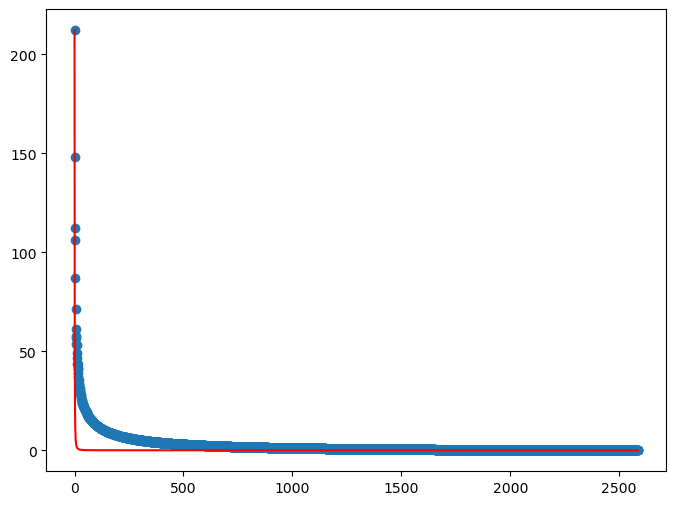

In [44]:
U,S,Vt = svd(Demean)

# observe cuan rapidamente caen los SVD
idx = range(len(S))
func = [S[0]/((i+1) ** 2) for i in idx ]

plt.figure(figsize = (8, 6))
plt.plot(idx, func, color = 'r')
plt.scatter(idx, S)

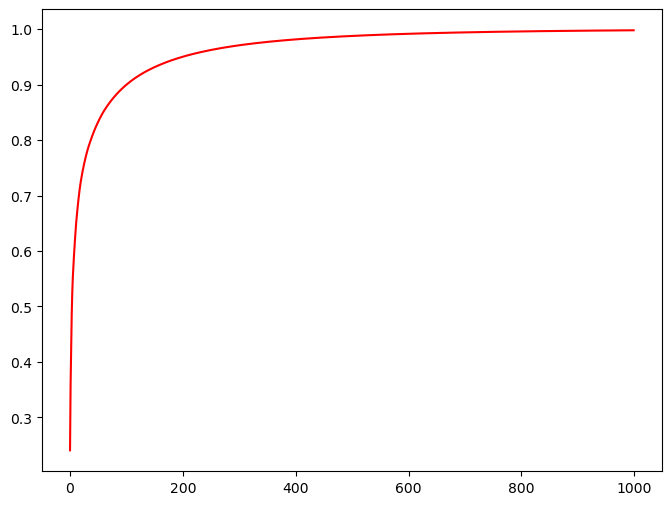

In [45]:
rg =1000
idx = range(0,rg)
var_explained = np.round(S**2/np.sum(S**2), decimals=6)

cumsum=var_explained[0:rg].cumsum()

plt.figure(figsize = (8, 6))
plt.plot(idx,cumsum , color = 'r')

In [46]:
sum(var_explained[0:rg])

0.9978890061224774

Aplicando la Descomposición en Valores Singulares a estas nuevas imágenes y reteniendo solo $K=1000$ valores singulares se explica el $99.7$%  de la varianza con estos valores singulares. 

#### 3.4. Representando los rostros en las bases

Las eigenfaces nos dice que cada rostro puede ser representado a partir de la aproximación a la matriz original por la matriz de dimensión reducida (determinada en el punto anterior), más el rostro promedio. Muestre que esto es posible para las imágenes de Serena Williams. Compare las imágenes reconstruidas con las originales.

In [49]:
n,k=X .shape

S2= np.resize(S,[n,1])*np.eye(n,k) 

l = 1000

reconstructed=np.dot(U[:,0:l],np.dot(S2[0:l,0:l],Vt[0:l,:]))
reconstructed = pd.DataFrame(reconstructed)


In [50]:
x_reconstructed = reconstructed + Xmean

In [51]:
x_reconstructed

,0,1,2,3,4,5,6,7,8,9,...,2904,2905,2906,2907,2908,2909,2910,2911,2912,2913
0,0.151847,0.196643,0.200534,0.225967,0.317878,0.395430,0.425989,0.441401,0.435042,0.423793,...,0.136061,0.133390,0.154806,0.158906,0.163958,0.166976,0.167198,0.185013,0.181617,0.194752
1,0.201531,0.216376,0.241321,0.263362,0.276219,0.300815,0.317562,0.340065,0.367452,0.390463,...,0.571471,0.799458,0.917395,0.933081,0.901602,0.889847,0.917912,0.913332,0.807373,0.635683
2,0.380638,0.383381,0.443458,0.581568,0.633104,0.644266,0.662464,0.688152,0.685694,0.702818,...,0.979956,0.993983,0.937665,0.376490,0.061472,0.098588,0.081747,0.092469,0.092837,0.092838
3,0.720466,0.697482,0.622149,0.454367,0.402790,0.438094,0.576170,0.681742,0.730757,0.759377,...,0.368691,0.375953,0.433889,0.456750,0.475251,0.472419,0.502805,0.410636,0.121048,0.061700
4,0.374919,0.432581,0.556682,0.648327,0.678990,0.674162,0.628173,0.584820,0.536697,0.511989,...,0.051921,0.065690,0.076955,0.088900,0.098676,0.039145,0.045344,0.079580,0.078983,0.085583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2583,0.255457,0.286892,0.338157,0.364448,0.362688,0.394445,0.429443,0.503178,0.567094,0.615093,...,0.221117,0.184140,0.206153,0.212680,0.244821,0.250918,0.250661,0.256433,0.232801,0.227711
2584,0.351159,0.390874,0.384619,0.378476,0.479976,0.577438,0.610015,0.613355,0.615024,0.627795,...,0.566977,0.565947,0.562672,0.550278,0.523105,0.496840,0.477186,0.380665,0.195382,0.043051
2585,0.144921,0.173364,0.222316,0.279011,0.330425,0.328654,0.372355,0.444446,0.500953,0.567096,...,0.191830,0.177002,0.200676,0.212485,0.198517,0.227154,0.365148,0.542757,0.621065,0.621150
2586,0.150024,0.222444,0.273366,0.345219,0.428753,0.477236,0.494563,0.520876,0.549897,0.573971,...,0.785571,0.811325,0.822197,0.853072,0.875556,0.885381,0.836033,0.801706,0.899815,0.947511


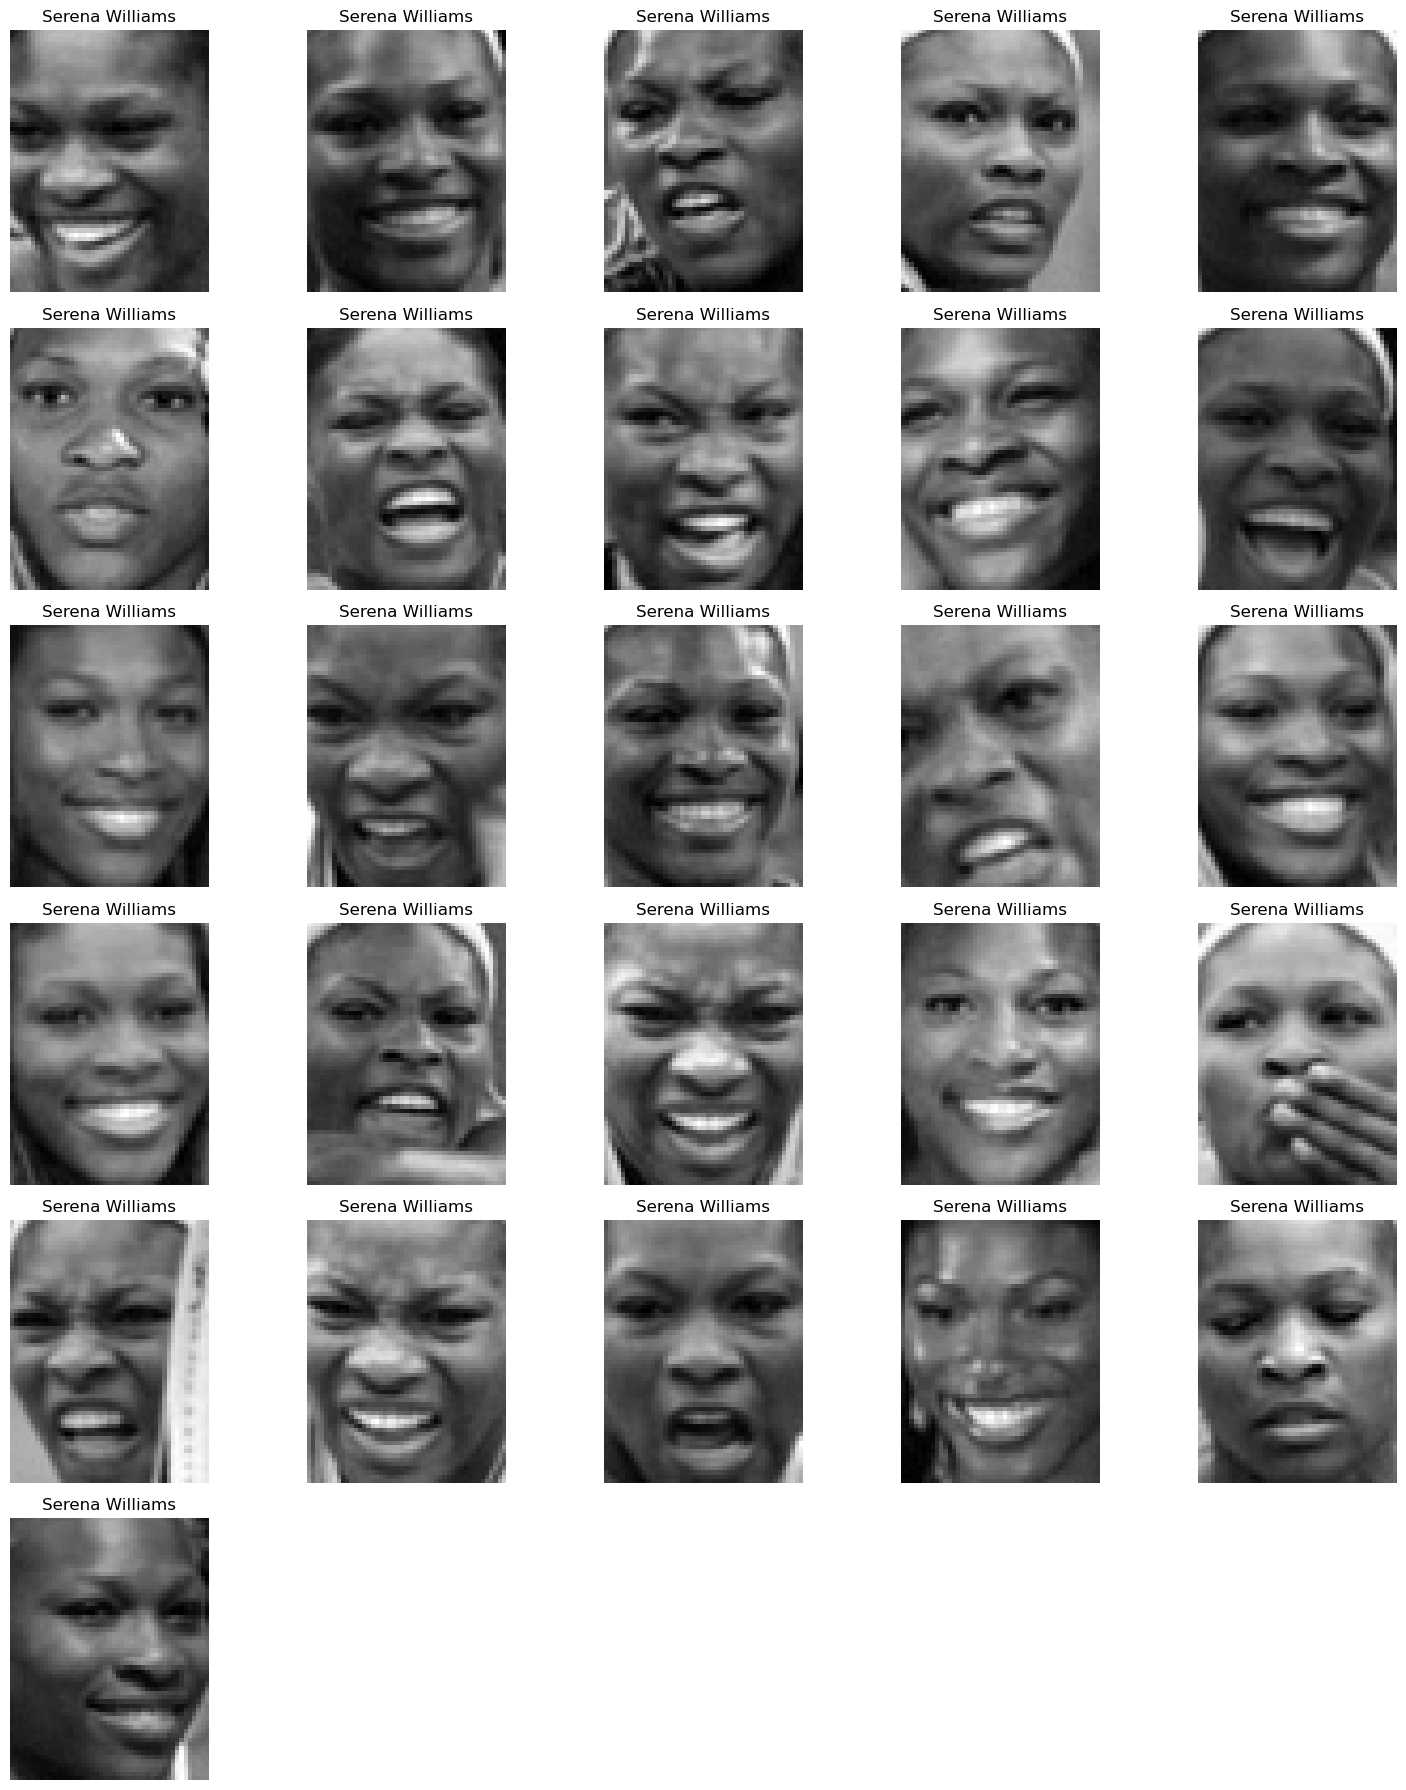

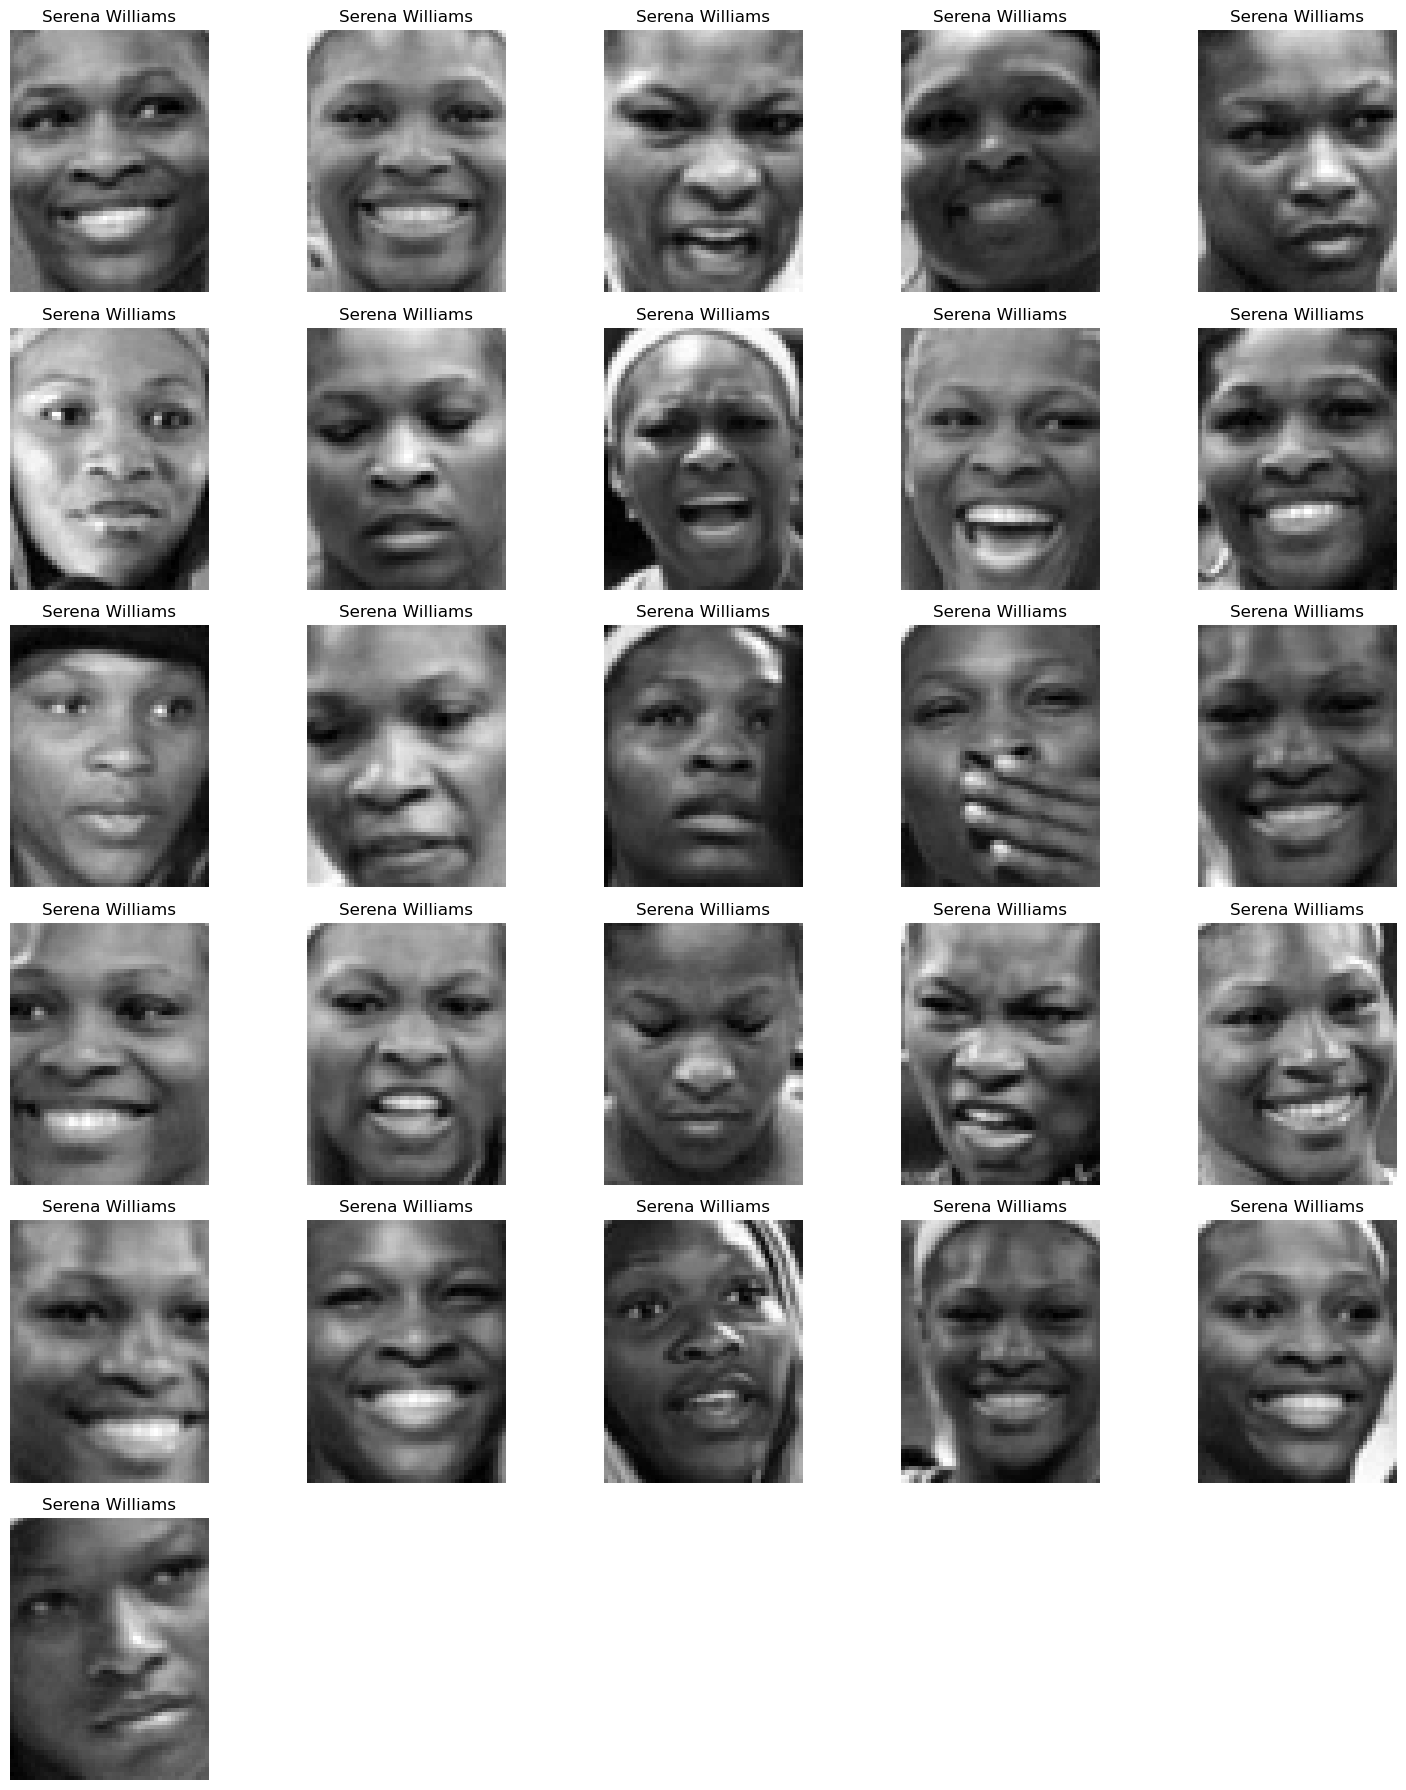

In [66]:
cols = 5
n = len(indices_serena)

# Partimos en 2 grupos de 26
for part in range(2):
    start = part * 26
    end = min((part+1) * 26, n)
    subset = indices_serena[start:end]
    
    rows = (len(subset) + cols - 1) // cols
    plt.figure(figsize=(15, 3*rows))

    for i, idx in enumerate(subset):
        plt.subplot(rows, cols, i+1)
        img = x_reconstructed.iloc[idx].to_numpy().reshape(h,w)
        plt.imshow(img, cmap='gray')
        plt.title(nombre)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

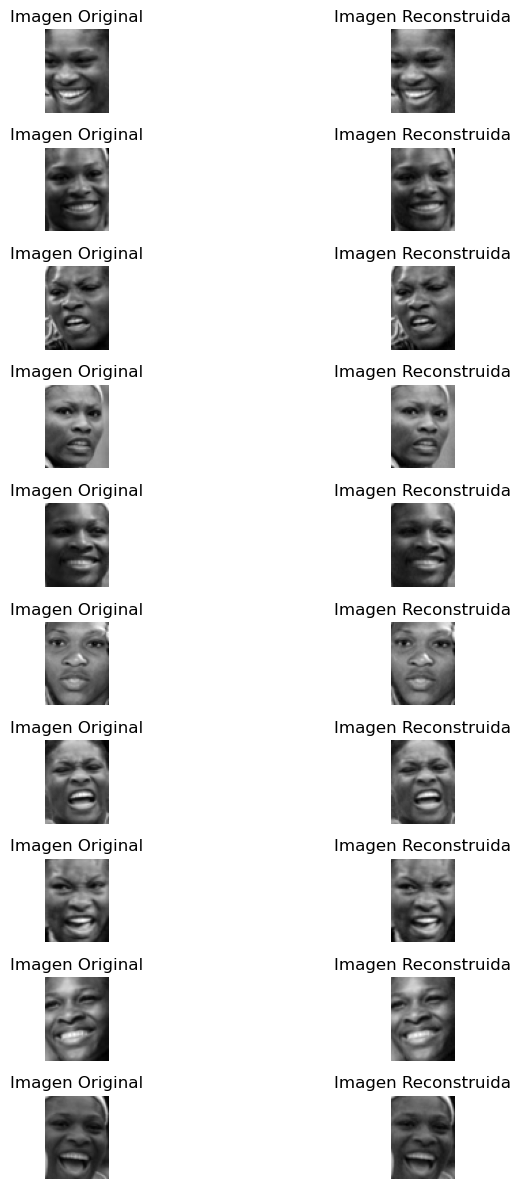

In [82]:
plt.figure(figsize=(10, 12))

for i, idx in enumerate(indices_serena[:10]):
    # Imagen original
    img_original = X.iloc[idx].to_numpy().reshape((h, w))
    
    # Imagen - promedio
    img_dif = x_reconstructed.iloc[idx].to_numpy().reshape((h, w))
    
    # Graficar original
    plt.subplot(len(indices_serena[:10]), 2, 2*i+1)
    plt.imshow(img_original, cmap="gray")
    plt.title("Imagen Original")
    plt.axis("off")
    
    # Graficar diferencia
    plt.subplot(len(indices_serena[:10]), 2, 2*i+2)
    plt.imshow(img_dif, cmap="gray")
    plt.title("Imagen Reconstruida")
    plt.axis("off")

plt.tight_layout()
plt.show()

Con base en el análisis de descomposición de valores singulares en el que se determinó que con un $K=1000$ se podía explicar el **99,7%** de la varianza explicada, se reconstruye la matriz X con estos 1,000 componentes principales. A partir de ahí, se vuelven a calcular las imagenes de Serena Williams, encontrando que el producto de la reconstrucción con la reducción de componentes principales, muestra unas imágenes muy similares a las originales.

Inicialmente se imprimen todas las 52 imagenes de Serena Williams con la matriz reconstruida, y finalmente se toman 10 imagenes para comparar cómo era la imagen original versus la imagen reconstruída, encontrando que las diferencias son casi imperceptibles y con la ventaja que la matriz reconstruida tiene solamente 1000 componentes principales.

### 4. Uniendo Aprendizaje No Supervisado y Supervisado

Dado que cada rostro puede ser representado por las eigenfaces, y la relación que existe entre componentes principales y la SVD, esto sugiere que los componentes principales aquí determinados pueden servir de insumo para un algoritmo de clasificación de aprendizaje supervisado. En este sección del taller haremos esto.

Para ello construiremos un modelo de clasificación logístico para predecir si la imagen pertenece a `George W Bush`  (el individuo con más imágenes en la base)  o no.

#### 4.1. Identificando a `George W Bush`

Cree una variable binaria que tome el valor 1 si la imagen pertenece a `George W Bush` y 0 en caso contrario.

In [89]:
X_df = df.drop(columns=['nombre'])
y_df = (df['nombre'] == 'George W Bush').astype(int)

In [91]:
X_df

,0,1,2,3,4,5,6,7,8,9,...,2904,2905,2906,2907,2908,2909,2910,2911,2912,2913
0,0.152941,0.193464,0.202614,0.236601,0.304575,0.384314,0.440523,0.444444,0.431373,0.431373,...,0.134641,0.139869,0.147712,0.155556,0.160784,0.166013,0.173856,0.179085,0.183007,0.186928
1,0.201307,0.214379,0.231373,0.256209,0.278431,0.300654,0.316340,0.339869,0.362092,0.385621,...,0.550327,0.794771,0.926797,0.932026,0.894118,0.887582,0.925490,0.909804,0.816993,0.631373
2,0.375163,0.380392,0.435294,0.586928,0.631373,0.636601,0.670588,0.688889,0.687582,0.695425,...,0.989542,1.000000,0.926797,0.369935,0.070588,0.092810,0.083660,0.091503,0.090196,0.090196
3,0.711111,0.707190,0.624837,0.465359,0.402614,0.430065,0.573856,0.670588,0.745098,0.759477,...,0.362092,0.381699,0.437909,0.467974,0.462745,0.479739,0.504575,0.419608,0.107190,0.060131
4,0.369935,0.443137,0.564706,0.641830,0.687582,0.667974,0.607843,0.577778,0.537255,0.515033,...,0.050980,0.069281,0.079739,0.086275,0.096732,0.039216,0.062745,0.070588,0.083660,0.078431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2583,0.256209,0.284967,0.347712,0.358170,0.355556,0.384314,0.433987,0.511111,0.569935,0.605229,...,0.206536,0.194771,0.198693,0.216993,0.240523,0.250980,0.250980,0.248366,0.235294,0.228758
2584,0.352941,0.385621,0.392157,0.373856,0.481046,0.572549,0.605229,0.616993,0.616993,0.619608,...,0.564706,0.563399,0.566013,0.551634,0.518954,0.503268,0.467974,0.379085,0.196078,0.048366
2585,0.147712,0.173856,0.244444,0.274510,0.328105,0.354248,0.371242,0.453595,0.503268,0.566013,...,0.189542,0.180392,0.201307,0.207843,0.194771,0.231373,0.369935,0.547712,0.615686,0.619608
2586,0.152941,0.219608,0.274510,0.346405,0.428758,0.475817,0.494118,0.524183,0.558170,0.573856,...,0.783007,0.818301,0.824837,0.848366,0.867974,0.886275,0.841830,0.806536,0.905882,0.956863


In [93]:
y_df

0       0
1       1
2       0
3       0
4       1
       ..
2583    0
2584    1
2585    1
2586    0
2587    1
Name: nombre, Length: 2588, dtype: int32

Se crea la variable solicitada, que será utilizada como la variable a predecir dentro del modelo de clasificación logístico y también se deja listo el dataframe inicial X.

#### 4.2. Bases de Entrenamiento y Prueba.

Divida la base utilizada anteriormente en dos: 80% de la base de imágenes asígnelas a la base de entrenamiento y el 20% restante a la de prueba, utilice un `random_state=10101`. 

In [106]:
X_train, X_test, y_train, y_test = train_test_split(
    X_df, y_df, 
    test_size=0.2,  
    random_state=10101
)

#### 4.3. Descomposición en Valores Singulares 

Para la base de entrenamiento y de prueba, realice la descomposición en valores singulares (Recuerde recentrar las matrices para que tenga media 0). 

In [108]:
mean_train = X_train.mean(axis=0)
X_train_centered = X_train - mean_train
X_test_centered = X_test - mean_train  

U_train, S_train, Vt_train = svd(X_train_centered)
U_test, S_test, Vt_test = svd(X_test_centered)

Se realiza el cálculo de la media y se recentran los conjuntos de entrenamiento y test y posteriormente se realiza la descomposición en valores singulares.

#### 4.4. Estimación de modelo de aprendizaje supervisado


Utilizando $k=1000$ valores singulares, construya los 1000 primeros componentes principales y úselos como predictores en su modelo logístico. Utilice como métrica de performance el porcentaje de imágenes de `George W Bush` clasificadas correctamente.

Para estimar su modelo logístico utilice el `solver='sag`,`random_state=10101` y `max_iter=1000`. Como se muestra a continuación:



In [121]:
l = 1000

x_train_pc=U_train[:, :l] * S_train[:l]
X_test_pc = np.dot(X_test_centered, Vt_train[:l, :].T)

Modelo_Logistico = LogisticRegression(solver='sag',random_state=10101,max_iter=1000)
Modelo_Logistico.fit(x_train_pc, y_train)
y_pred = Modelo_Logistico.predict(X_test_pc)

In [125]:
recall_bush = recall_score(y_test, y_pred, pos_label=1)
print("Porcentaje de imágenes de George W Bush clasificadas correctamente:", recall_bush * 100, "%")

Porcentaje de imágenes de George W Bush clasificadas correctamente: 74.10714285714286 %


Se realiza la construcción del modelo tomando como base 1000 componentes principales y usandolos como predictores del modelo logístico. Se realiza la predicción del modelo y finalmente se calcula el porcentaje de imágenes de "George W Bush" clasificadas correctamente que son semejantes a calcular el recall para la clase 1:"George W Bush".

#### 4.5. Mejorando el Ajuste

Trate ahora el número de valores singulares como un hiper-parámetro a encontrar. Emplee validación cruzada con 5 o 10 folds (dependiendo de su poder computacional) para encontrar el número óptimo de valores singulares. Con este modelo, evalúe el porcentaje de imágenes de `George W Bush` clasificadas correctamente en su muestra de prueba. Compare y discuta esta forma de elegir el número de variables con aquella utilizada en  4.4. (Esto puede tomar mucho tiempo y requerir mucha capacidad computacional, puede aprovechar los recursos de [Google Colab](https://colab.research.google.com/))


In [162]:
valores_singulares = list(range(100, 2001, 100))
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mejor_score = -1
mejor_l = None
mejor_modelo = None
resultados = {}

for l in valores_singulares:
    # Transformación de entrenamiento
    X_train_pc = U_train[:, :l] * S_train[:l]
    
    # Transformación de test
    X_test_pc = np.dot(X_test_centered, Vt_train[:l, :].T)

    # Entrenamiento
    modelo = LogisticRegression(
        solver='sag', 
        random_state=10101, 
        max_iter=1000
    )
    modelo.fit(X_train_pc, y_train)

    # Predicción
    y_pred = modelo.predict(X_test_pc)

    
    score = cross_val_score(modelo, X_train_pc, y_train, cv=kf, scoring='recall')
    promedio = np.mean(score)
    resultados[l] = promedio

    print(f"l={l} --> Accuracy promedio: {promedio:.4f}")

    # Actualizar si es mejor
    if promedio > mejor_score:
        mejor_score = promedio
        mejor_valor = l

l=100 --> Accuracy promedio: 0.6907
l=200 --> Accuracy promedio: 0.7126
l=300 --> Accuracy promedio: 0.7255
l=400 --> Accuracy promedio: 0.7228
l=500 --> Accuracy promedio: 0.7198
l=600 --> Accuracy promedio: 0.7372
l=700 --> Accuracy promedio: 0.7347
l=800 --> Accuracy promedio: 0.7372
l=900 --> Accuracy promedio: 0.7347
l=1000 --> Accuracy promedio: 0.7328
l=1100 --> Accuracy promedio: 0.7328
l=1200 --> Accuracy promedio: 0.7347
l=1300 --> Accuracy promedio: 0.7374
l=1400 --> Accuracy promedio: 0.7347
l=1500 --> Accuracy promedio: 0.7347
l=1600 --> Accuracy promedio: 0.7347
l=1700 --> Accuracy promedio: 0.7347
l=1800 --> Accuracy promedio: 0.7347
l=1900 --> Accuracy promedio: 0.7347
l=2000 --> Accuracy promedio: 0.7347


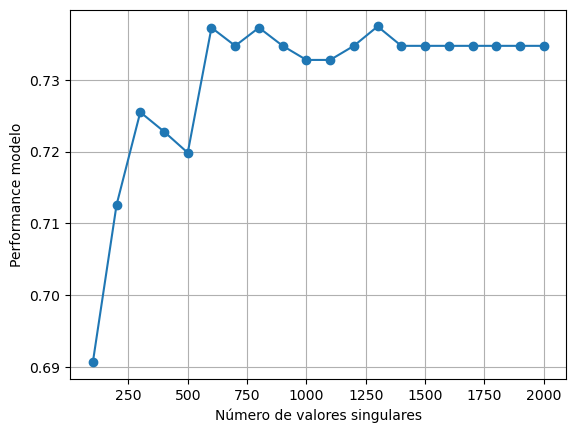

In [164]:
vs = list(resultados.keys())
puntaje = list(resultados.values())


plt.plot(vs, puntaje, marker="o")  
plt.xlabel("Número de valores singulares")
plt.ylabel("Performance modelo")
plt.grid(True)
plt.show()

Se utiliza el número de valores singulares como un hiperparametro en el cual se evalúa el desempeño del modelo en función de el porcentaje de imágenes de George W Bush clasificadas correctamente. Inicialmente se toman 100 valores singulares y se va iterando de 100 en 100 hasta llegar a 2000 valores singulares.

Como se puede observar en la gráfica a medida que aumenta el número de valores singulares, el desempeño del modelo mejora. Sin embargo, al superar la barrera de los 1200 valores singulares, el desempeño del modelo se estanca y no mejora. Esto se puede interpretar como que llega a un punto en el que es tal la varianza explicada por los componentes singulares, que el aumentarlos no mejora la capacidad del modelo para predecir mejor.

Por otra parte, y para las iteraciones realizadas en este ejercicio, el número de valores singulares que dió el mejor desempeño del modelo fue **800** valores singulares con un porcentaje de imágenes de George W Bush clasificadas correctamente de **73.72%** En comparación con el desempeño del primer modelo donde el número de valores singulares fue de **74.1%** esta configuración de hiperparámetros no suele mostrar una mejoría. Sin embargo, se debe tener presente que para la validación cruzada se utiliza el promedio del performance.